No duplicates
No null values

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools
from sklearn.metrics import accuracy_score, r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")

In [ ]:
df.shape

(18249, 14)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [ ]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')

<Axes: >

## There are no null values

In [ ]:
df.duplicated().sum()

0

## There are no duplicate values

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the specified columns
# Replace 'df' with the actual variable name if it's different

# Select the specified columns
selected_columns = ['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region']

# Create a new DataFrame with only the selected columns
selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


## Each and every columns are necessary

In [ ]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [ ]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [ ]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the pair plot
columns_for_pairplot = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


# Subset the DataFrame with selected columns
df_subset = df[columns_for_pairplot]


# Create a pair plot
sns.pairplot(df_subset)

# Show the plot
plt.show()


### There is a positive relation between 'total volume' and all the other columns.
### All the other columns are also positively correlated with all the columns except the target column.

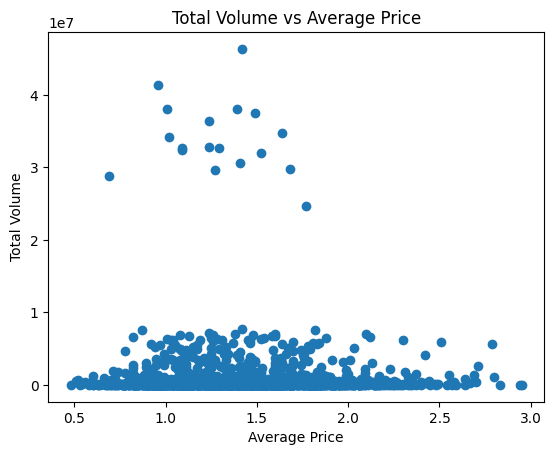

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'AveragePrice' and 'Total Volume' columns
plt.scatter(df.sample(2000)['AveragePrice'], df.sample(2000)['Total Volume'])
plt.title('Total Volume vs Average Price')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.show()

## Total volume can go above 3 if the average price is in between 0.5 to 2

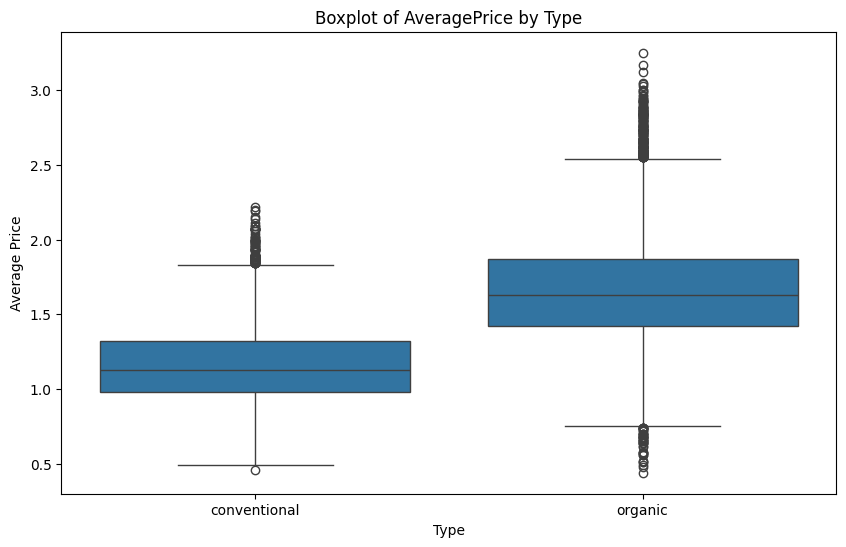

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='AveragePrice', data=df)
plt.title('Boxplot of AveragePrice by Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()

### There are more outliers in organic type

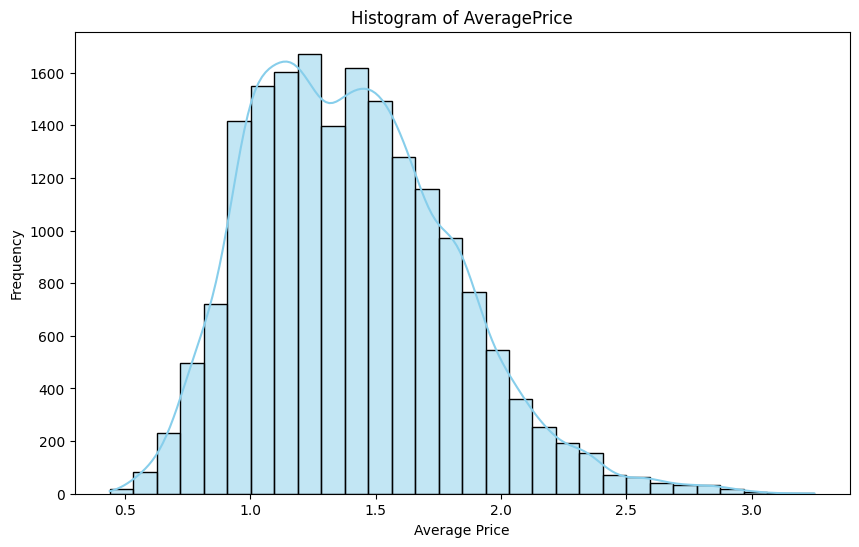

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AveragePrice'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of AveragePrice')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

## Average price of 1.0 to 1.6 are high in frequency

In [ ]:
sns.violinplot(x='type', y='AveragePrice', data=df)
plt.title('Violin Plot of AveragePrice by Type')
plt.show()

### Conventional type has high density at average price of 0.75 to 1.25
### Organic type has high density at average price of 1.0 to 2.0

In [ ]:
sns.regplot(x='Total Volume', y='AveragePrice', data=df)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.show()

## Feature Engineering

In [ ]:
df['region'].nunique()

54

In [ ]:
df['type'].nunique()

2

In [ ]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)


In [ ]:
df_final.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  year  Month  Day  type_organic  
0     8603.62       93.25          0.0  2015     12   27             0  
1     9408.07       97.49          0.0  2015     12   20             0  
2     8042.21      103.14          0.0  2015     12   13             0  
3     5677.40      133.76          0.0  2015     12    6             0  
4     5986.26      197.69          0.0  2015     11   29             0

In [ ]:
#train test split
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
df_final

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  year  Month  Day  type_organic  
0         8603.62       93.25          0.0  2015     12   27             0  
1         9408.07       97.49          0.0  2015     12   20             0  
2         8042.21      103.14          0.0  2015     12   13             0  
3         5677.40      133.76          0.0  2015     12    6             0  
4         5986.26      197.69          0.0  2015     11   29             0  
...           ...         ...          ...   ...    ...  ...           ...  
18244    13066.82      431.85          0.0  2018      2    4             1  
18245     8940.04      324.80          0.0  2018      1   28             1  
18246     9351.80       42.31          0.0  2018      1   21             1  
18247    10919.54       50.00          0.0  2018      1   14             1  
18248    11988.14       26.01          0.0  2018      1    7             1  

[18249 rows x 13 columns]

In [ ]:
# import pandas as pd

# df = df_final[[col for col in df_final.columns if col != 'AveragePrice'] + ['AveragePrice']]


In [ ]:
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...          ...           ...           ...      ...        ...     ...   
18244 2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[18249 rows x 15 columns]

In [ ]:
# Assuming df is your DataFrame and 'type_organic' is the column with uint8 dtype
# df['type_organic'] = df['type_organic'].astype(int)


In [ ]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [ ]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Month                    int64
Day                      int64
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train_scaled,y_train)
ranpred=rdr.predict(X_test_scaled)

In [ ]:

score_1 = r2_score(y_test, ranpred)

score_2 = mean_absolute_error(y_test, ranpred)
score_3 = mean_squared_error(y_test,ranpred)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)


R squared error :  0.8674268324758397
Mean Absolute Error :  0.10056153424657534
Mean Squared Error :  0.021300409298630127


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train_scaled,y_train)
despredict=dtr.predict(X_test_scaled)

In [ ]:
score_1 = r2_score(y_test, despredict)

score_2 = mean_absolute_error(y_test, despredict)
score_2 = mean_squared_error(y_test, despredict)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)

R squared error :  0.7213667215855277
Mean Absolute Error :  0.044767753424657525
Mean Squared Error :  0.021300409298630127


In [ ]:
X_train.dtypes

Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
Month             int64
Day               int64
type_organic      uint8
dtype: object

In [ ]:
# Define the Node class for the decision tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def find_best_split(X, y):
    m, n = X.shape
    if m <= 1:
        return None

    # Calculate the mean of the target values
    total_mean = np.mean(y)
    best_mse = float('inf')
    best_feature = None
    best_threshold = None

    for feature in range(n):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_indices = X[:, feature] < threshold
            right_indices = ~left_indices

            if np.sum(left_indices) > 0 and np.sum(right_indices) > 0:
                left_mse = mean_squared_error(y[left_indices])
                right_mse = mean_squared_error(y[right_indices])
                mse = (np.sum(left_indices) * left_mse + np.sum(right_indices) * right_mse) / m

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

    return best_feature, best_threshold

# Function to build the decision tree
def build_tree(X, y, depth=1, max_depth=None):
    if depth == max_depth or mean_squared_error(y) == 0:
        return Node(value=np.mean(y))

    feature, threshold = find_best_split(X, y)

    if feature is None:
        return Node(value=np.mean(y))

    left_indices = X[:, feature] < threshold
    right_indices = ~left_indices

    left_subtree = build_tree(X[left_indices], y[left_indices], depth+1, max_depth)
    right_subtree = build_tree(X[right_indices], y[right_indices], depth+1, max_depth)

    return Node(feature=feature, threshold=threshold, left=left_subtree, right=right_subtree)

# Function to make predictions with the decision tree
def predict_tree(node, X):
    if node.value is not None:
        return node.value

    if X[node.feature] < node.threshold:
        return predict_tree(node.left, X)
    else:
        return predict_tree(node.right, X)

# Function to evaluate the decision tree on the test set
def evaluate_tree(tree, X_test):
    return np.array([predict_tree(tree, x) for x in X_test])

# Build the decision tree
tree = build_tree(X_train_scaled, y_train.to_numpy())

# Make predictions on the test set
y_pred = evaluate_tree(tree, X_test_scaled)




In [ ]:
import sklearn
score_1 = r2_score(y_test, y_pred)
print("R squared error : ", score_1)
mae = mean_absolute_error(y_test.to_numpy(),y_pred)
print('Mean Absolute Error on Test Set:', mae)
mse_custom = sklearn.metrics.mean_squared_error(y_test.to_numpy(), y_pred)
print('Mean Squared Error on Test Set:', mse_custom)


R squared error :  0.7038250085147486
Mean Absolute Error on Test Set: 0.14108767123287672
Mean Squared Error on Test Set: 0.04758616438356165
